In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

figPath = '../img/'
figExt  = 'eps'

matplotlib.set_loglevel('error')

matplotlib.rcParams.update({
  "text.usetex": True,
  "font.family": "serif",
  "pgf.texsystem": "pdflatex",
  "pgf.rcfonts": False,
})

# Load and View Data

Number of data points: 200
t in [0, 199]


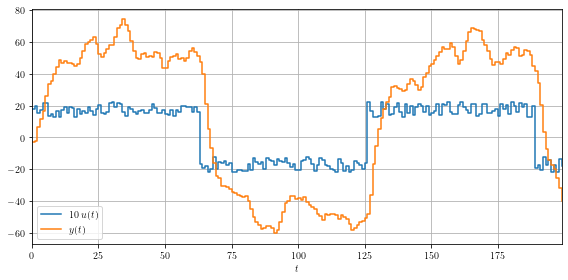

In [2]:
file = '../data.csv'
data = pd.read_csv(file, header=None, names=['u', 'y'])
N = len(data)

t = data.index.values
u = data.u.values
y = data.y.values

print('Number of data points:', N)
print(f't in [{t[0]}, {t[-1]}]')

plt.figure(figsize=(8,4))
plt.plot(t, 10*u, label='$10\\,u(t)$', drawstyle='steps-post')
plt.plot(t, y   , label='$y(t)$'    , drawstyle='steps-post')
plt.xlim(t[0], t[-1])
plt.xlabel('$t$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figPath + 'data.' + figExt, format=figExt)
plt.show()

## Input Fourier Transform

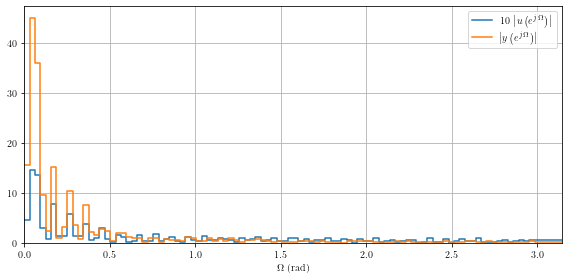

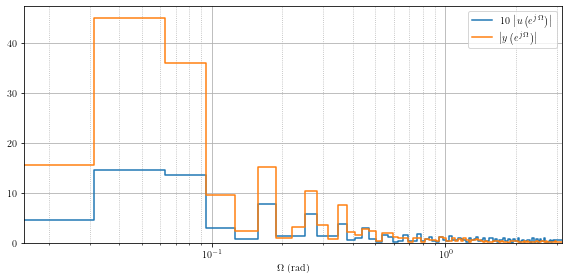

In [3]:
from scipy import fft

u_rfft = fft.rfft(u, norm='forward')
u_rfft[1:-1] = 2*u_rfft[1:-1]
y_rfft = fft.rfft(y, norm='forward')
y_rfft[1:-1] = 2*y_rfft[1:-1]

u_rfft_mag = np.abs(u_rfft)
y_rfft_mag = np.abs(y_rfft)
Omega = np.linspace(0, np.pi, len(u_rfft_mag))

plt.figure(figsize=(8,4))
plt.plot(Omega, 10*u_rfft_mag, label='$10\\,\\left|u\\left(e^{{j\,\\Omega}}\\right)\\right|$', drawstyle='steps-post')
plt.plot(Omega, y_rfft_mag   , label='$\\left|y\\left(e^{{j\,\\Omega}}\\right)\\right|$'     , drawstyle='steps-post')
plt.xlim(Omega[0], Omega[-1])
plt.ylim(0)
plt.xlabel('$\\Omega$ (rad)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figPath + 'data_fourier.' + figExt, format=figExt)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(Omega, 10*u_rfft_mag, label='$10\\,\\left|u\\left(e^{{j\,\\Omega}}\\right)\\right|$', drawstyle='steps-post')
plt.plot(Omega, y_rfft_mag   , label='$\\left|y\\left(e^{{j\,\\Omega}}\\right)\\right|$'     , drawstyle='steps-post')
plt.xscale('log')
plt.xlim(Omega[1]/2, Omega[-1])
plt.ylim(0)
plt.xlabel('$\\Omega$ (rad)')
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend()
plt.tight_layout()
plt.savefig(figPath + 'data_fourier_log.' + figExt, format=figExt)
plt.show()

## Separate Identification and Validation Data

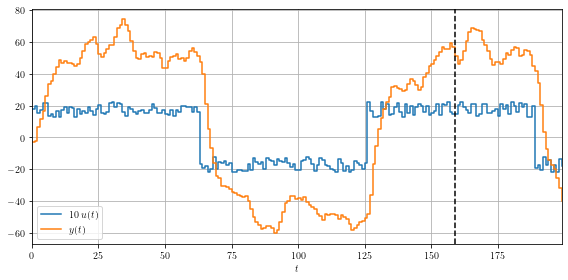

In [4]:
N_fold = 160

t_i = t[:N_fold]
u_i = u[:N_fold]
y_i = y[:N_fold]

t_v = t[N_fold:]
u_v = u[N_fold:]
y_v = y[N_fold:]

plt.figure(figsize=(8,4))
plt.plot(t, 10*u, label='$10\,u(t)$', drawstyle='steps-post')
plt.plot(t, y   , label='$y(t)$'    , drawstyle='steps-post')
plt.axvline(t[N_fold-1], color='black', linestyle='--')
plt.xlim(t[0], t[-1])
plt.xlabel('$t$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figPath + 'data_folded.' + figExt, format=figExt)
plt.show()

# Generic Model

\begin{gather*}
A(q) \, y(t) = \dfrac{B(q)}{F(q)} \, u(t) + \dfrac{C(q)}{D(q)} \, e(t)
\\
y(t) = G(q) \, u(t) + H(q) \, e(t)
\\
G(q) = \dfrac{B(q)}{A(q) \, F(q)}
\qquad
H(q) = \dfrac{C(q)}{A(q) \, D(q)}
\\
A(q) = 1 + a_1 \, q^{-1} + \dotsb + a_{n_a} \, q^{-n_a}
\\
B(q) = q^{-n_k} \, \left(b_0 + b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b}\right)
\\
C(q) = 1 + c_1 \, q^{-1} + \dotsb + c_{n_c} \, q^{-n_c}
\\
D(q) = 1 + d_1 \, q^{-1} + \dotsb + d_{n_d} \, q^{-n_d}
\\
F(q) = 1 + f_1 \, q^{-1} + \dotsb + f_{n_f} \, q^{-n_f}
\end{gather*}

## Prediction Error Method

\begin{gather*}
\hat{y}(t) = L_u(q) \, u(t) + L_y(q) \, y(t)
\\
L_u(q) = \dfrac{G(q)}{H(q)}
\\
L_y(q) = 1 - \dfrac{1}{H(q)}
\end{gather*}

## Prediction Cost

\begin{gather*}
  \hat{J} = \dfrac{1}{N} \sum_{k=1}^N \left(y(t) - \hat{y}(t)\right)^2
\end{gather*}

# ARX

\begin{gather*}
y(t) = G(q) \, u(t) + H(q) \, e(t)
\\
G(q) = \dfrac{B(q)}{A(q)}
\qquad
H(q) = \dfrac{1}{A(q)}
\\
A(q) = 1 + a_1 \, q^{-1} + \dotsb + a_{n_a} \, q^{-n_a}
\\
B(q) = q^{-n_k} \, \left(b_0 + b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b}\right)
\end{gather*}

\begin{gather*}
n_a = \{1, 2, 3, 4\}
\qquad
n_b = \{0, 1, 2, 3, 4\}
\qquad
n_k = \{1, 2, 3, 4\}
\end{gather*}

In [5]:
from functions import arx

na_range = range(1, 4 + 1)
nb_range = range(0, 4 + 1)
nk_range = range(1, 4 + 1)

models_arx = arx(u_i, y_i, u_v, y_v, na_range, nb_range, nk_range)

## Display Best 

In [6]:
from functions import display_models

columns=[
  'na', 'nb', 'nk',
  'Jv', 'Ji',
  'AICv', 'AICCv',
  'AICi', 'AICCi',
  'A', 'B',
]

for criterion in ['Jv', 'AICCv', 'AICCi']:
  display_models(models_arx.sort_values(by=[criterion]), precision=3, qty=6, columns=columns)

,na,nb,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,A,B
56,3,4,1,5.133,5.296,81.427,86.072,282.699,283.653,[ 1. -1.419 0.514 -0.015],[ 0. 2.132 1.632 -1.689 0.274 -0.061]
36,2,4,1,5.179,5.297,79.783,83.283,280.747,281.484,[ 1. -1.409 0.489],[ 0. 2.127 1.646 -1.695 0.23 -0.044]
52,3,3,1,5.376,5.263,81.274,84.774,279.705,280.442,[ 1. -1.418 0.511 -0.013],[ 0. 2.13 1.628 -1.685 0.24 ]
32,2,3,1,5.410,5.264,79.531,82.077,277.740,278.289,[ 1. -1.41 0.49],[ 0. 2.126 1.642 -1.69 0.21 ]
64,4,1,1,5.419,5.611,79.600,82.145,287.946,288.495,[ 1. -1.356 0.452 0.114 -0.101],[0. 2.147 0.994]
68,4,2,1,5.503,5.167,82.208,85.708,276.753,277.490,[ 1. -1.399 0.398 0.189 -0.109],[ 0. 2.165 1.714 -1.594]


,na,nb,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,A,B
24,2,1,1,5.801,5.750,78.320,79.463,287.883,288.142,[ 1. -1.31 0.417],[0. 2.142 0.941]
44,3,1,1,5.556,5.740,78.594,80.358,289.581,289.971,[ 1. -1.352 0.503 -0.046],[0. 2.143 0.873]
28,2,2,1,5.589,5.276,78.832,80.596,276.114,276.503,[ 1. -1.407 0.483],[ 0. 2.162 1.611 -1.602]
20,2,0,1,6.384,5.910,80.153,80.820,290.269,290.423,[ 1. -1.371 0.464],[0. 2.656]
40,3,0,1,6.074,5.875,80.160,81.303,291.314,291.572,[ 1. -1.415 0.557 -0.051],[0. 2.605]
32,2,3,1,5.410,5.264,79.531,82.077,277.740,278.289,[ 1. -1.41 0.49],[ 0. 2.126 1.642 -1.69 0.21 ]


,na,nb,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,A,B
28,2,2,1,5.589,5.276,78.832,80.596,276.114,276.503,[ 1. -1.407 0.483],[ 0. 2.162 1.611 -1.602]
68,4,2,1,5.503,5.167,82.208,85.708,276.753,277.490,[ 1. -1.399 0.398 0.189 -0.109],[ 0. 2.165 1.714 -1.594]
32,2,3,1,5.410,5.264,79.531,82.077,277.740,278.289,[ 1. -1.41 0.49],[ 0. 2.126 1.642 -1.69 0.21 ]
48,3,2,1,5.634,5.275,81.153,83.698,278.076,278.625,[ 1. -1.399 0.463 0.012],[ 0. 2.156 1.624 -1.623]
72,4,3,1,5.611,5.134,84.986,89.631,277.739,278.693,[ 1. -1.421 0.441 0.188 -0.124],[ 0. 2.134 1.686 -1.821 0.449]
52,3,3,1,5.376,5.263,81.274,84.774,279.705,280.442,[ 1. -1.418 0.511 -0.013],[ 0. 2.13 1.628 -1.685 0.24 ]


# ARMAX

\begin{gather*}
y(t) = G(q) \, u(t) + H(q) \, e(t)
\\
G(q) = \dfrac{B(q)}{A(q)}
\qquad
H(q) = \dfrac{C(q)}{A(q)}
\\
A(q) = 1 + a_1 \, q^{-1} + \dotsb + a_{n_a} \, q^{-n_a}
\\
B(q) = q^{-n_k} \, \left(b_0 + b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b}\right)
\\
C(q) = 1 + c_1 \, q^{-1} + \dotsb + c_{n_c} \, q^{-n_c}
\end{gather*}

\begin{gather*}
n_a = \{1, 2, 3, 4\}
\qquad
n_b = \{0, 1, 2, 3, 4\}
\qquad
n_c = \{1, 2, 3, 4\}
\qquad
n_k = \{1, 2, 3, 4\}
\end{gather*}

In [7]:
from functions import armax

na_range = range(1, 4 + 1)
nb_range = range(0, 4 + 1)
nc_range = range(1, 4 + 1)
nk_range = range(1, 4 + 1)

models_armax = armax(u_i, y_i, u_v, y_v, na_range, nb_range, nc_range, nk_range)

## Display Best 

In [8]:
from functions import display_models

columns=[
  'na', 'nb', 'nc', 'nk',
  'Jv', 'Ji',
  'AICv', 'AICCv',
  'AICi', 'AICCi',
  'A', 'B', 'C',
]

for criterion in ['Jv', 'AICCv', 'AICCi']:
  display_models(models_armax.sort_values(by=[criterion]), precision=3, qty=6, columns=columns)

,na,nb,nc,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,A,B,C
64,1,4,1,1,5.199,5.922,79.935,83.435,298.594,299.330,[ 1. -0.848],[ 0. 2.262 2.875 -0.327 -0.13 -0.202],[1. 0.429]
144,2,4,1,1,5.250,5.299,82.332,86.977,282.814,283.768,[ 1. -1.405 0.485],[ 0. 2.075 1.709 -1.778 0.308 -0.044],[1. 0.013]
256,4,1,1,1,5.277,5.337,80.531,84.031,281.932,282.669,[ 1. -0.755 -0.382 0.415 -0.114],[0. 1.906 2.829],[1. 0.627]
272,4,2,1,1,5.473,5.147,83.994,88.640,278.136,279.090,[ 1. -1.218 0.146 0.276 -0.109],[ 0. 2.092 2.16 -1.528],[1. 0.201]
128,2,3,1,1,5.476,5.266,82.015,85.515,279.812,280.548,[ 1. -1.406 0.486],[ 0. 2.073 1.706 -1.777 0.286],[1. 0.013]
172,3,0,4,1,5.568,5.472,84.678,89.323,287.945,288.898,[ 1. -1.619 0.986 -0.277],[0. 2.619],[ 1. -0.252 0.298 -0.05 0.081]


,na,nb,nc,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,A,B,C
80,2,0,1,1,6.244,5.905,81.264,82.406,292.128,292.387,[ 1. -1.4 0.489],[0. 2.537],[ 1. -0.04]
160,3,0,1,1,5.853,5.802,80.675,82.440,291.308,291.698,[ 1. -1.582 0.822 -0.158],[0. 2.368],[ 1. -0.188]
112,2,2,1,1,5.579,5.277,80.757,83.302,278.136,278.685,[ 1. -1.395 0.473],[ 0. 2.102 1.725 -1.602],[1. 0.022]
64,1,4,1,1,5.199,5.922,79.935,83.435,298.594,299.330,[ 1. -0.848],[ 0. 2.262 2.875 -0.327 -0.13 -0.202],[1. 0.429]
32,1,2,1,1,6.021,5.902,81.809,83.574,294.060,294.450,[ 1. -0.84],[ 0. 2.239 2.843 -0.368],[1. 0.434]
256,4,1,1,1,5.277,5.337,80.531,84.031,281.932,282.669,[ 1. -0.755 -0.382 0.415 -0.114],[0. 1.906 2.829],[1. 0.627]


,na,nb,nc,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,A,B,C
124,2,2,4,1,5137.121,4.239,359.770,365.770,249.074,250.274,[ 1. -1.767 0.773],[ 0. 2.305 0.972 -3.096],[ 1. -0.425 -0.188 -0.447 -0.189]
232,3,4,3,1,7611.760,4.183,379.498,388.927,250.981,252.765,[ 1. -2.052 1.304 -0.245],[ 0. 2.146 0.498 -3.251 1.102 -0.318],[ 1. -0.724 -0.069 -0.389]
296,4,3,3,1,6086.247,4.214,370.551,379.980,252.143,253.926,[ 1. -1.99 1.097 -0.023 -0.078],[ 0. 2.219 0.536 -3.317 0.721],[ 1. -0.661 -0.185 -0.335]
236,3,4,4,1,6614.672,4.221,375.882,387.437,254.401,256.523,[ 1. -1.697 0.656 0.048],[ 0. 2.206 1.197 -2.998 -0.028 -0.176],[ 1. -0.362 -0.221 -0.458 -0.23 ]
20,1,1,2,1,12.835,5.109,112.086,113.851,270.950,271.339,[ 1. -0.825],[0. 2.112 2.98 ],[1. 0.554 0.404]
24,1,1,3,1,12.067,5.067,111.619,114.164,271.633,272.182,[ 1. -0.821],[0. 2.134 3.023],[1. 0.619 0.487 0.115]


# Output Error

\begin{gather*}
y(t) = G(q) \, u(t) + H(q) \, e(t)
\\
G(q) = \dfrac{B(q)}{F(q)}
\qquad
H(q) = 1
\\
B(q) = q^{-n_k} \, \left(b_0 + b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b}\right)
\\
F(q) = 1 + f_1 \, q^{-1} + \dotsb + f_{n_f} \, q^{-n_f}
\end{gather*}

\begin{gather*}
n_b = \{0, 1, 2, 3, 4\}
\qquad
n_f = \{1, 2, 3, 4\}
\qquad
n_k = \{1, 2, 3, 4\}
\end{gather*}

In [9]:
from functions import oe

nb_range = range(0, 4 + 1)
nf_range = range(1, 4 + 1) 
nk_range = range(1, 4 + 1)

models_oe = oe(u_i, y_i, u_v, y_v, nb_range, nf_range, nk_range)

## Display Best 

In [10]:
from functions import display_models

columns=[
  'nb', 'nf', 'nk',
  'Jv', 'Ji',
  'AICv', 'AICCv',
  'AICi', 'AICCi',
  'B', 'F'
]

for criterion in ['Jv', 'AICCv', 'AICCi']:
  display_models(models_oe.sort_values(by=[criterion]), precision=3, qty=6, columns=columns)

,nb,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,B,F
69,4,2,2,108.924,48.942,201.626,205.126,636.502,637.238,[ 0.000e+00 0.000e+00 7.955e+00 -6.364e+00 ...,[ 1. -1.295 0.353]
65,4,1,2,112.710,49.103,200.993,203.538,635.027,635.576,[ 0. 0. 7.95 -3.135 0.035 0.423 -2....,[ 1. -0.897]
68,4,2,1,125.264,44.195,207.217,210.717,620.178,620.915,[ 0. 3.728 -0.551 -1.656 0.938 -1.252],[ 1. -1.47 0.509]
77,4,4,2,125.821,36.652,211.394,217.394,594.237,595.437,[ 0. 0. 7.145 -15.096 10.089 -2.0...,[ 1. -2.658 2.339 -0.596 -0.072]
73,4,3,2,125.835,36.655,209.399,214.044,592.248,593.202,[ 0. 0. 7.144 -15.703 11.388 -2.8...,[ 1. -2.746 2.58 -0.823]
78,4,4,3,126.315,68.113,211.551,217.551,693.387,694.587,[ 0. 0. 0. 10.506 -1.954 -5.907 4....,[ 1. -0.541 -0.734 0.62 -0.219]


,nb,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,B,F
65,4,1,2,112.710,49.103,200.993,203.538,635.027,635.576,[ 0. 0. 7.95 -3.135 0.035 0.423 -2....,[ 1. -0.897]
69,4,2,2,108.924,48.942,201.626,205.126,636.502,637.238,[ 0.000e+00 0.000e+00 7.955e+00 -6.364e+00 ...,[ 1. -1.295 0.353]
66,4,1,3,126.671,68.237,205.664,208.209,687.678,688.227,[ 0. 0. 0. 10.487 -5.604 0.365 -0....,[ 1. -0.895]
68,4,2,1,125.264,44.195,207.217,210.717,620.178,620.915,[ 0. 3.728 -0.551 -1.656 0.938 -1.252],[ 1. -1.47 0.509]
70,4,2,3,126.771,68.234,207.695,211.195,689.671,690.408,[ 0. 0. 0. 10.487 -5.256 0.178 -0....,[ 1. -0.862 -0.029]
64,4,1,1,136.532,45.141,208.662,211.208,621.566,622.115,[ 0. 3.681 1.748 -0.588 0.952 -2.418],[ 1. -0.89]


,nb,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,B,F
72,4,3,1,139.654,33.552,213.567,218.212,578.094,579.048,[ 0. 2.959 -3.458 -1.011 1.689 0.148],[ 1. -2.745 2.58 -0.824]
44,2,4,1,172.372,34.054,219.986,223.486,578.474,579.211,[ 0. 3.369 -6.335 3.172],[ 1. -3.121 3.616 -1.802 0.314]
76,4,4,1,139.650,33.531,215.566,221.566,579.993,581.193,[ 0. 2.884 -0.265 -4.806 0.786 2.043],[ 1. -1.775 -0.084 1.683 -0.802]
40,2,3,1,195.958,34.973,223.116,225.661,580.733,581.282,[ 0. 4.629 -8.623 4.305],[ 1. -2.759 2.61 -0.841]
60,3,4,1,171.498,34.030,221.783,226.428,580.361,581.314,[ 0. 3.005 -4.027 -0.22 1.531],[ 1. -2.863 2.906 -1.131 0.098]
57,3,3,2,155.141,36.544,215.773,219.273,589.765,590.501,[ 0. 0. 6.991 -14.95 9.947 -1.655],[ 1. -2.75 2.588 -0.827]


# Box-Jenkins

\begin{gather*}
y(t) = G(q) \, u(t) + H(q) \, e(t)
\\
G(q) = \dfrac{B(q)}{F(q)}
\qquad
H(q) = \dfrac{C(q)}{D(q)}
\\
B(q) = q^{-n_k} \, \left(b_0 + b_1 \, q^{-1} + \dotsb + b_{n_b} \, q^{-n_b}\right)
\\
C(q) = 1 + c_1 \, q^{-1} + \dotsb + c_{n_c} \, q^{-n_c}
\\
D(q) = 1 + d_1 \, q^{-1} + \dotsb + d_{n_d} \, q^{-n_d}
\\
F(q) = 1 + f_1 \, q^{-1} + \dotsb + f_{n_f} \, q^{-n_f}
\end{gather*}

\begin{gather*}
n_b = \{0, 1, 2, 3, 4\}
\qquad
n_c = \{0, 1, 2, 3, 4\}
\qquad
n_d = \{1, 2, 3, 4\}
\qquad
n_f = \{1, 2, 3, 4\}
\qquad
n_k = \{1, 2, 3, 4\}
\end{gather*}

In [11]:
from functions import bj # diversos erros

nb_range = range(0, 4 + 1)
nc_range = range(0, 4 + 1)
nd_range = range(1, 4 + 1)
nf_range = range(1, 4 + 1)
nk_range = range(1, 4 + 1)

models_bj = bj(u_i, y_i, u_v, y_v, nb_range, nc_range, nd_range, nf_range, nk_range)

d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in square
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: invalid value encountered in true_divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in square
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
d:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: invalid value

## Display Best 

In [12]:
from functions import display_models

columns=[
  'nb', 'nc', 'nd', 'nf', 'nk',
  'Jv', 'Ji',
  'AICv', 'AICCv',
  'AICi', 'AICCi',
  'B', 'C', 'D', 'F',
]

for criterion in ['Jv', 'AICCv', 'AICCi']:
  display_models(models_bj.sort_values(by=[criterion]), precision=3, qty=6, columns=columns)

,nb,nc,nd,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,B,C,D,F
1308,4,0,2,4,1,5.34,5.01,89.008,98.437,279.83,281.614,[0. 2.024 2.89 0.407 2.452 2.621],[1.],[ 1. -1.445 0.552],[ 1. -0.796 0.071 0.851 -0.77 ]
980,3,0,2,2,1,5.396,5.168,83.425,88.07,278.794,279.748,[ 0. 2.053 2.523 -0.667 0.171],[1.],[ 1. -1.441 0.552],[ 1. -1.002 0.141]
976,3,0,2,1,1,5.398,5.167,81.439,84.939,276.769,277.505,[ 0. 2.061 2.872 -0.187 0.118],[1.],[ 1. -1.44 0.551],[ 1. -0.834]
664,2,0,2,3,1,5.487,5.214,84.096,88.741,280.206,281.16,[ 0. 2.063 2.592 -0.655],[1.],[ 1. -1.44 0.551],[ 1. -0.97 0.072 0.034]
668,2,0,2,4,1,5.502,5.204,86.206,92.206,281.897,283.097,[0. 2.049 4.507 2.254],[1.],[ 1. -1.442 0.553],[ 1. -0.033 -0.6 -0.131 0.064]
660,2,0,2,2,1,5.521,5.214,82.344,85.844,278.228,278.965,[0. 2.078 3.219 0.275],[1.],[ 1. -1.44 0.551],[ 1. -0.672 -0.139]


,nb,nc,nd,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,B,C,D,F
656,2,0,2,1,1,5.524,5.214,80.363,82.909,276.229,276.778,[ 0. 2.083 2.874 -0.198],[1.],[ 1. -1.44 0.551],[ 1. -0.838]
336,1,0,2,1,1,5.941,5.183,81.276,83.04,273.256,273.646,[0. 2.052 2.863],[1.],[ 1. -1.439 0.55 ],[ 1. -0.832]
352,1,0,3,1,1,5.683,5.193,81.496,84.041,275.571,276.12,[0. 2.039 2.825],[1.],[ 1. -1.403 0.452 0.069],[ 1. -0.835]
976,3,0,2,1,1,5.398,5.167,81.439,84.939,276.769,277.505,[ 0. 2.061 2.872 -0.187 0.118],[1.],[ 1. -1.44 0.551],[ 1. -0.834]
660,2,0,2,2,1,5.521,5.214,82.344,85.844,278.228,278.965,[0. 2.078 3.219 0.275],[1.],[ 1. -1.44 0.551],[ 1. -0.672 -0.139]
368,1,0,4,1,1,5.677,5.083,83.457,86.957,274.137,274.874,[0. 2.057 2.86 ],[1.],[ 1. -1.41 0.413 0.198 -0.094],[ 1. -0.832]


,nb,nc,nd,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi,B,C,D,F
1336,4,0,4,3,1,9.15,4.635,112.552,124.107,269.396,271.519,[0. 2.153 2.096 0.911 3.028 0.013],[1.],[ 1. -1.407 0.341 0.302 -0.131],[ 1. -1.158 1.262 -0.823]
1016,3,0,4,3,1,9.249,4.756,110.981,120.41,271.499,273.283,[0. 2.153 2.096 0.899 3.034],[1.],[ 1. -1.407 0.341 0.302 -0.131],[ 1. -1.159 1.262 -0.824]
984,3,0,2,3,1,7.272,4.9,97.359,103.359,272.29,273.49,[0. 2.172 2.101 0.918 3.037],[1.],[ 1. -1.456 0.563],[ 1. -1.158 1.262 -0.824]
336,1,0,2,1,1,5.941,5.183,81.276,83.04,273.256,273.646,[0. 2.052 2.863],[1.],[ 1. -1.439 0.55 ],[ 1. -0.832]
1000,3,0,3,3,1,8.463,4.853,105.426,113.012,272.735,274.212,[0. 2.153 2.066 0.909 2.997],[1.],[ 1. -1.39 0.39 0.121],[ 1. -1.16 1.262 -0.826]
368,1,0,4,1,1,5.677,5.083,83.457,86.957,274.137,274.874,[0. 2.057 2.86 ],[1.],[ 1. -1.41 0.413 0.198 -0.094],[ 1. -0.832]


# Results

In [13]:
from functions import models_frame

models = pd.concat([models_frame(), models_arx, models_armax, models_oe, models_bj], ignore_index=True)

print('Successful models:', len(models.loc[models.B.notnull()]))
print('Failed models:    ', len(models.loc[models.B.isnull()]))

Successful models: 1120
Failed models:     960


## Display Models with Lowest Cost

In [14]:
from functions import display_models
from control import frequency_response, mag2db

columns=[
  'model',
  'na', 'nb', 'nc', 'nd', 'nf', 'nk',
  'Jv', 'Ji',
  'AICv', 'AICCv',
  'AICi', 'AICCi',
]

qty = 6
for criterion in ['Jv', 'AICCv', 'AICCi']:
  display_models(models.sort_values(by=[criterion]), precision=3, qty=qty, columns=columns)

,model,na,nb,nc,nd,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi
56,ARX,3,4,-,-,-,1,5.133,5.296,81.427,86.072,282.699,283.653
36,ARX,2,4,-,-,-,1,5.179,5.297,79.783,83.283,280.747,281.484
144,ARMAX,1,4,1,-,-,1,5.199,5.922,79.935,83.435,298.594,299.33
224,ARMAX,2,4,1,-,-,1,5.25,5.299,82.332,86.977,282.814,283.768
336,ARMAX,4,1,1,-,-,1,5.277,5.337,80.531,84.031,281.932,282.669
1788,BJ,-,4,0,2,4,1,5.34,5.01,89.008,98.437,279.83,281.614


,model,na,nb,nc,nd,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi
24,ARX,2,1,-,-,-,1,5.801,5.75,78.32,79.463,287.883,288.142
44,ARX,3,1,-,-,-,1,5.556,5.74,78.594,80.358,289.581,289.971
28,ARX,2,2,-,-,-,1,5.589,5.276,78.832,80.596,276.114,276.503
20,ARX,2,0,-,-,-,1,6.384,5.91,80.153,80.82,290.269,290.423
40,ARX,3,0,-,-,-,1,6.074,5.875,80.16,81.303,291.314,291.572
32,ARX,2,3,-,-,-,1,5.41,5.264,79.531,82.077,277.74,278.289


,model,na,nb,nc,nd,nf,nk,Jv,Ji,AICv,AICCv,AICi,AICCi
204,ARMAX,2,2,4,-,-,1,5137.121,4.239,359.77,365.77,249.074,250.274
312,ARMAX,3,4,3,-,-,1,7611.76,4.183,379.498,388.927,250.981,252.765
376,ARMAX,4,3,3,-,-,1,6086.247,4.214,370.551,379.98,252.143,253.926
316,ARMAX,3,4,4,-,-,1,6614.672,4.221,375.882,387.437,254.401,256.523
100,ARMAX,1,1,2,-,-,1,12.835,5.109,112.086,113.851,270.95,271.339
1816,BJ,-,4,0,4,3,1,9.15,4.635,112.552,124.107,269.396,271.519


## Frequency Response

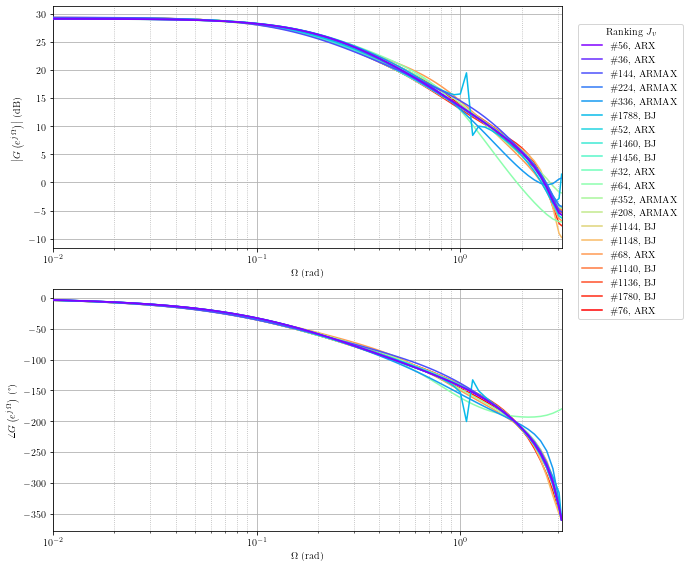

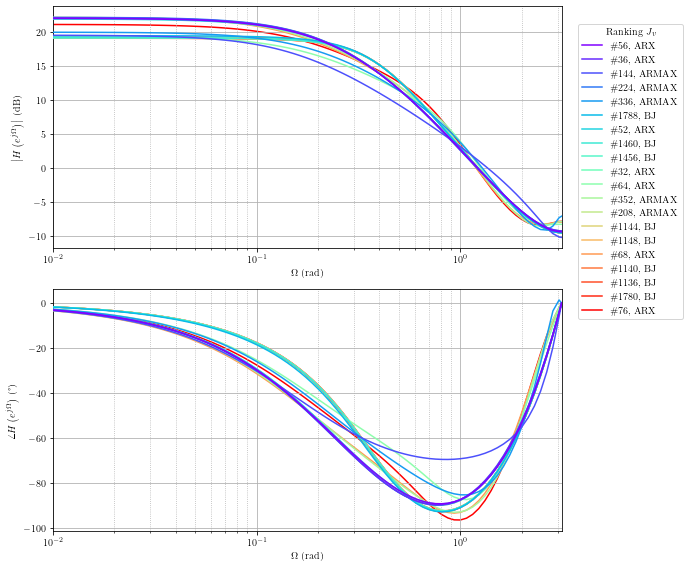

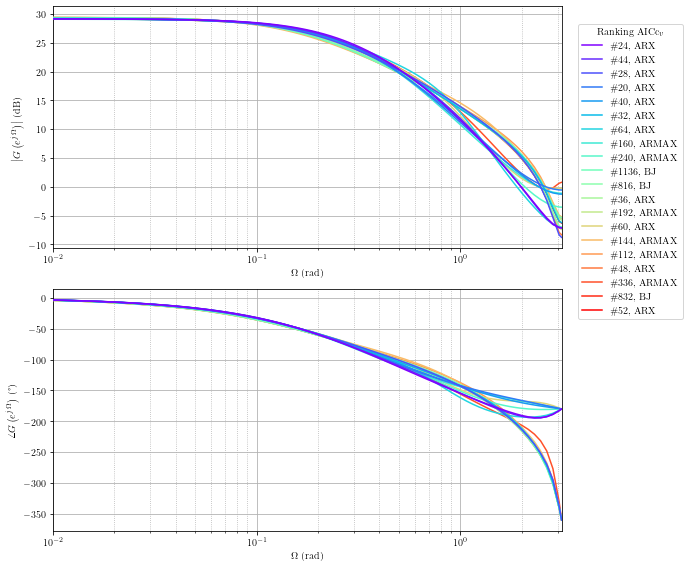

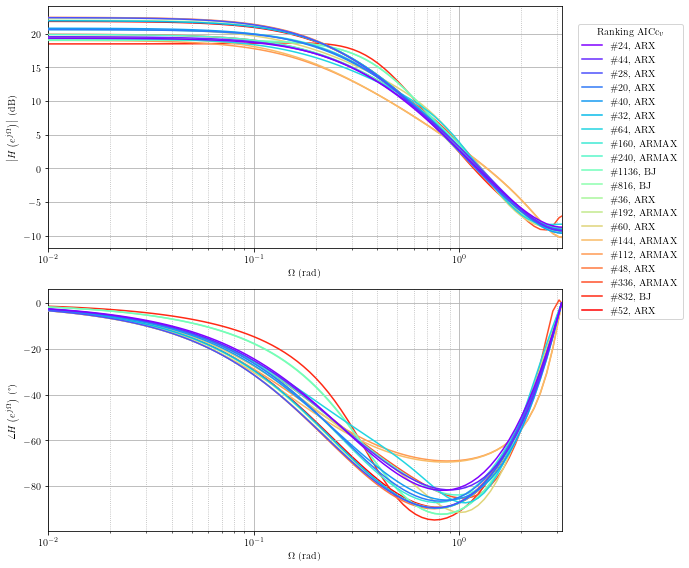

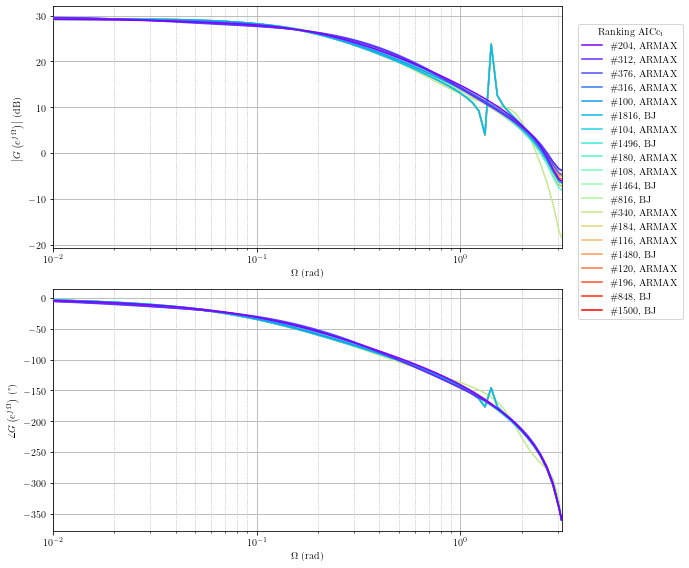

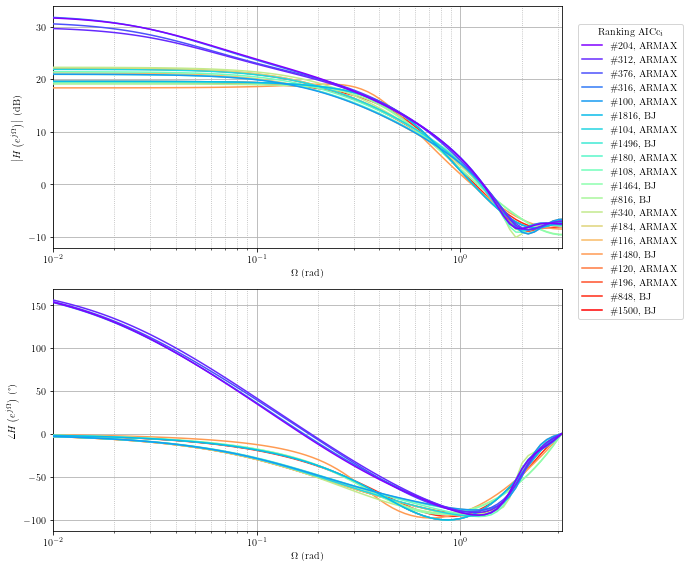

In [27]:
logspace = np.logspace(-2, 1, 100)
logspace = np.append(logspace[logspace < np.pi], np.pi)

costs = {
  'Jv': '$J_v$',
  'Ji': '$J_i$',
  'AICv': 'AIC${{}}_v$',
  'AICi': 'AIC${{}}_i$',
  'AICCv': 'AICc${{}}_v$',
  'AICCi': 'AICc${{}}_i$',
}

qty = 20
for criterion in ['Jv', 'AICCv', 'AICCi']:
  for tf in ['G', 'H']:
    fig, axs = plt.subplots(2, 1, figsize=(8,8))
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, qty)))
    for i, (index, model) in enumerate(models.sort_values(by=[criterion]).iterrows()):
      if i >= qty:
        break
      color = next(colors)
      mag, phase, omega = frequency_response(model[tf], omega=logspace)
      axs[0].plot(omega, mag2db(mag), c=color, zorder=qty-i)
      axs[1].plot(omega, 180/np.pi*np.unwrap(phase), c=color, zorder=qty-i, label=f"\\#{index}, {model.model}")

    for ax in axs:
      ax.set_xscale('log')
      ax.set_xlim(omega[0], omega[-1])
      ax.grid(which='major')
      ax.grid(which='minor', linestyle=':')
      ax.set_xlabel('$\\Omega$ (rad)')
    # axs[0].set_title(f'${tf}(q)$')
    axs[0].set_ylabel(f'$\\left| {tf}\\left(e^{{j \\, \\Omega}}\\right) \\right|$ (dB)')
    axs[1].set_ylabel(f'$\\angle{{{tf}\\left(e^{{j \\, \\Omega}}\\right)}}$ (°)')
    leg = fig.legend(title=f'Ranking {costs[criterion]}', bbox_to_anchor=(1.2, 0.96))
    plt.tight_layout()
    plt.savefig(figPath + f'bode_{tf}_{criterion}.' + figExt, format=figExt, bbox_extra_artists=(leg,), bbox_inches='tight')
    plt.show()

## Pole Zero Map

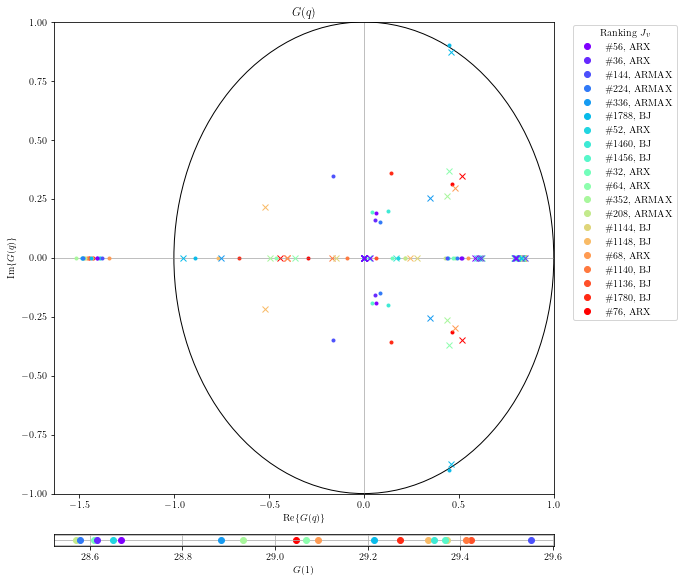

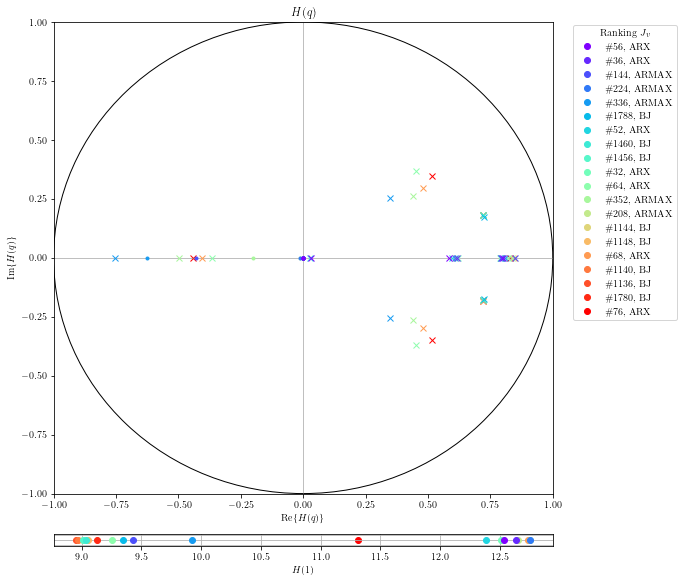

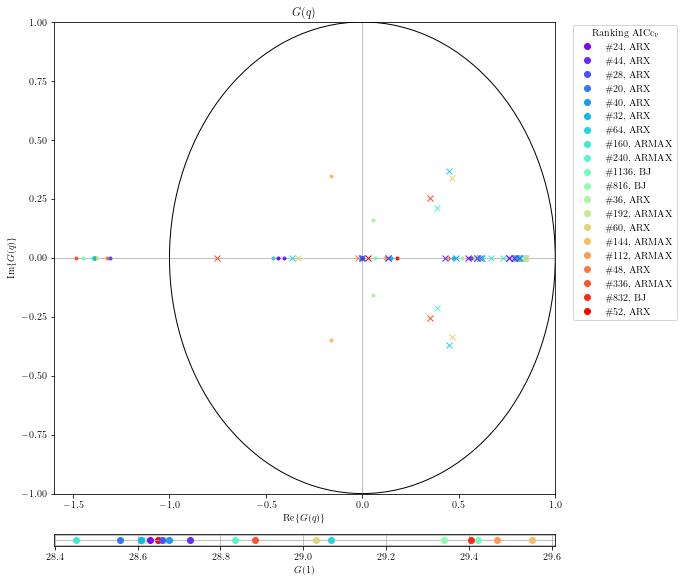

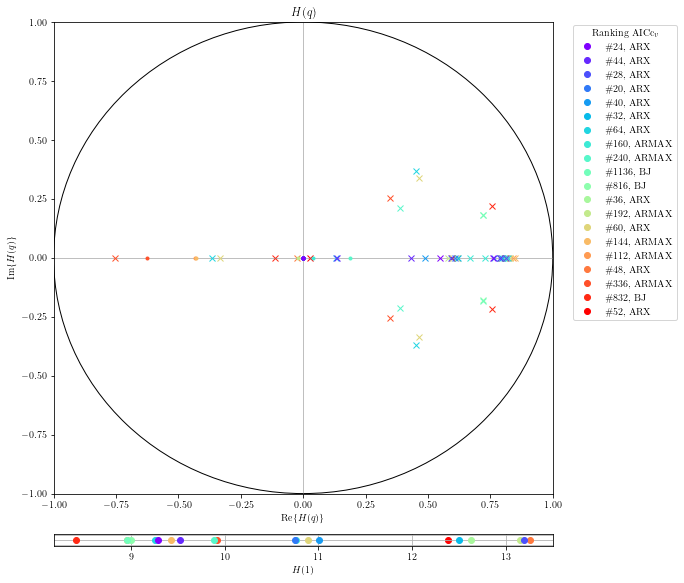

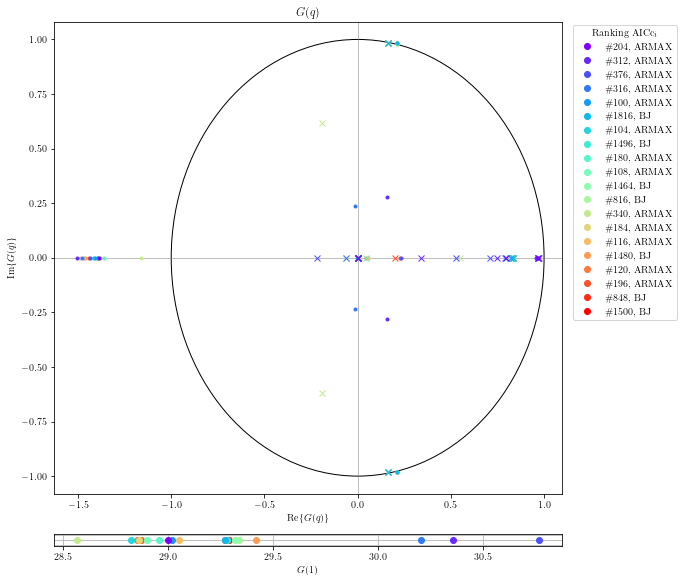

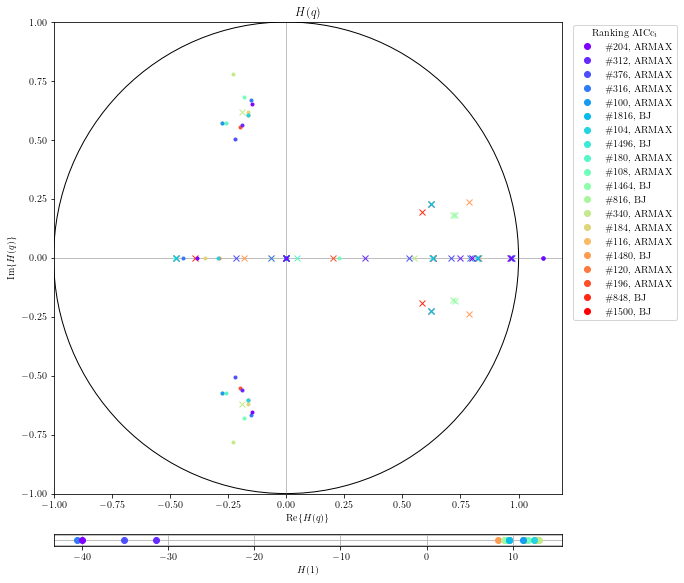

In [23]:
qty = 20
for criterion in ['Jv', 'AICCv', 'AICCi']:
  for tf in ['G', 'H']:
    fig, ax = plt.subplots(2, 1, figsize=(8,8.2), height_ratios=[8, 0.2])
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, qty)))
    for i, (index, model) in enumerate(models.sort_values(by=[criterion]).iterrows()):
      if i >= qty:
        break
      color = next(colors)
      for pole in model[f'p{tf}']:
        ax[0].plot(pole.real, pole.imag, 'x', c=color, zorder=qty-i)
      for zero in model[f'z{tf}']:
        ax[0].plot(zero.real, zero.imag, '.', c=color, zorder=qty-i)
      ax[1].plot(model[f'k{tf}'], 0, 'o', c=color, zorder=qty-i, label=f"\\#{index}, {model.model}")

    ax[0].set_title(f'${tf}(q)$')
    ax[1].set_xlabel(f'${tf}(1)$')
    ax[0].add_artist(plt.Circle((0, 0), 1, fill=False))
    ax[0].set_xlabel(f'$\\mathrm{{Re}}\\{{{tf}(q)\\}}$')
    ax[0].set_ylabel(f'$\\mathrm{{Im}}\\{{{tf}(q)\\}}$')
    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()
    ax[0].set_xlim(min(xlim[0], -1), max(xlim[1], 1))
    ax[0].set_ylim(min(ylim[0], -1), max(ylim[1], 1))
    ax[0].axhline(0, color='gray', linewidth=0.5)
    ax[0].axvline(0, color='gray', linewidth=0.5)
    ax[1].tick_params(axis='y',left=False, labelleft=False)
    ax[1].grid()
    fig.legend(title=f'Ranking {costs[criterion]}', bbox_to_anchor=(1.19, 0.96))
    plt.tight_layout()
    plt.savefig(figPath + f'zpk_{tf}_{criterion}.' + figExt, format=figExt)
    plt.show()

## Static Gains Scatter

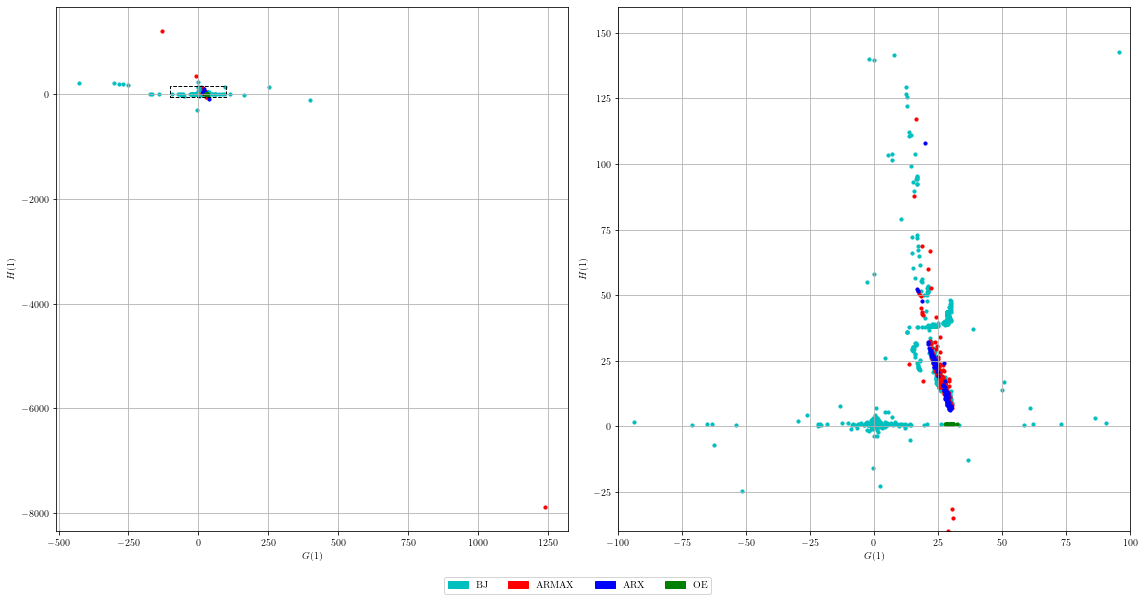

In [17]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 2, figsize=(16,8))

for i in range(0, 1+1):
  ax[i].scatter(models.loc[models.model == 'BJ'   ].kG, models.loc[models.model == 'BJ'   ].kH, s=10, color='c')
  ax[i].scatter(models.loc[models.model == 'ARMAX'].kG, models.loc[models.model == 'ARMAX'].kH, s=10, color='r')
  ax[i].scatter(models.loc[models.model == 'ARX'  ].kG, models.loc[models.model == 'ARX'  ].kH, s=10, color='b')
  ax[i].scatter(models.loc[models.model == 'OE'   ].kG, models.loc[models.model == 'OE'   ].kH, s=10, color='g')
  ax[i].set_xlabel('$G(1)$')
  ax[i].set_ylabel('$H(1)$')
  ax[i].grid()

ax[0].add_patch(plt.Rectangle((-100,-40), 200, 200, fill=False, linestyle='--'))

ax[1].set_xlim((-100, 100))
ax[1].set_ylim((-40, 160))

fig.legend(ncols=4, bbox_to_anchor=(0.625, 0), handles=[
  mpatches.Patch(label='BJ',    color='c'),
  mpatches.Patch(label='ARMAX', color='r'),
  mpatches.Patch(label='ARX',   color='b'),
  mpatches.Patch(label='OE',    color='g'),
])
plt.tight_layout()
plt.show()

## Predictions

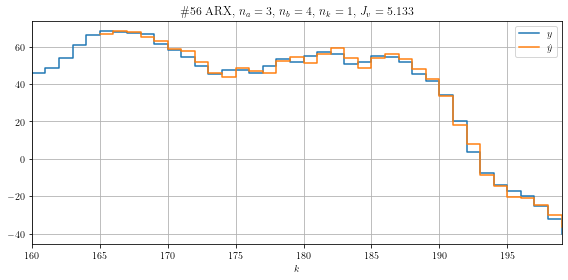

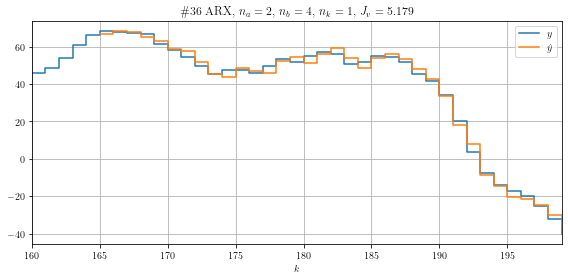

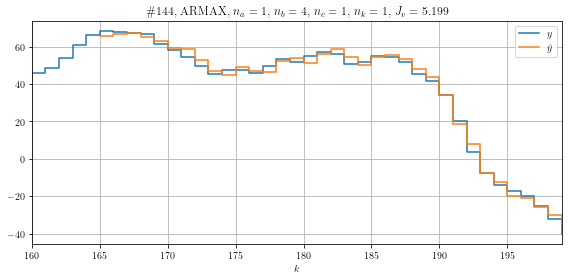

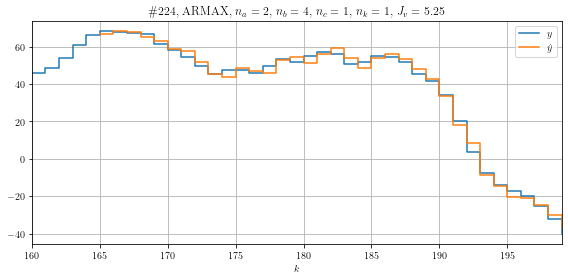

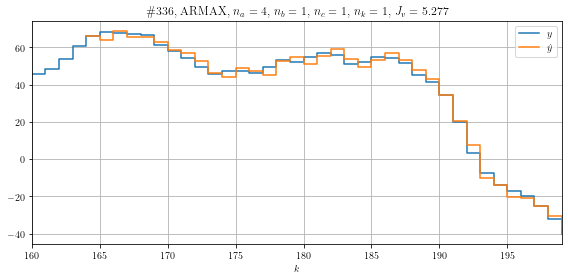

In [18]:
qty = 5
for i, (index, model) in enumerate(models.sort_values(by=['Jv']).iterrows()):
  if i >= qty:
    break

  if np.isnan(model.yp).any():
    continue

  if model.model == 'ARX':
    title = f'\\#{index} {model.model}, $n_a={model.na}$, $n_b={model.nb}$, $n_k={model.nk}$, $J_v={model.Jv:.4g}$'
  elif model.model == 'ARMAX':
    title = f'\\#{index}, {model.model}, $n_a={model.na}$, $n_b={model.nb}$, $n_c={model.nc}$, $n_k={model.nk}$, $J_v={model.Jv:.4g}$'
  elif model.model == 'OE':
    title = f'\\#{index}, {model.model}, $n_b={model.nb}$, $n_f={model.nf}$, $n_k={model.nk}$, $J_v={model.Jv:.4g}$'
  elif model.model == 'BJ':
    title = f'\\#{index}, {model.model}, $n_b={model.nb}$, $n_c={model.nc}$, $n_d={model.nd}$, $n_f={model.nf}$, $n_k={model.nk}$, $J_v={model.Jv:.4g}$'
  else:
    assert(False)

  plt.figure(figsize=(8,4))
  plt.title(title)
  plt.plot(t_v, y_v, label='$y$', drawstyle='steps-post')
  plt.plot(t_v[int(model.delay):], model.yp, label='$\\hat{y}$', drawstyle='steps-post')
  plt.xlim(t_v[0], t_v[-1])
  plt.xlabel('$k$')
  plt.grid()
  plt.legend()
  plt.tight_layout()
  plt.show()

# Model in Class

In [19]:
from control import TransferFunction

model = models.loc[(models.model == 'ARX') & (models.na == 2) & (models.nb == 2) & (models.nk == 1)]
assert(len(model) == 1)
model = model.iloc[0]

G0 = TransferFunction.minreal(TransferFunction([2, 2, -1.5], [1, -1.4, 0.48, 0], dt=True))
H0 = TransferFunction.minreal(TransferFunction([1, 0, 0, 0], [1, -1.4, 0.48, 0], dt=True))

print('G_0 =')
display(G0)
print('G =')
display(model.G)

print('H_0 =')
display(H0)
print('H =')
display(model.H)

print(f'J_v    = {model.Jv:7.3f}')
print(f'J_i    = {model.Ji:7.3f}')
print(f'AIC_v  = {model.AICv:7.3f}')
print(f'AICC_v = {model.AICCv:7.3f}')
print(f'AIC_i  = {model.AICi:7.3f}')
print(f'AICC_i = {model.AICCi:7.3f}')

G_0 =


TransferFunction(array([ 2. ,  2. , -1.5]), array([ 1.  , -1.4 ,  0.48,  0.  ]), True)

G =


TransferFunction(array([ 2.16246556,  1.61084338, -1.6016382 ]), array([ 1.        , -1.40683412,  0.48261202,  0.        ]), True)

H_0 =


TransferFunction(array([1., 0., 0.]), array([ 1.  , -1.4 ,  0.48]), True)

H =


TransferFunction(array([1., 0., 0.]), array([ 1.        , -1.40683412,  0.48261202]), True)

J_v    =   5.589
J_i    =   5.276
AIC_v  =  78.832
AICC_v =  80.596
AIC_i  = 276.114
AICC_i = 276.503


## Compare to Original System

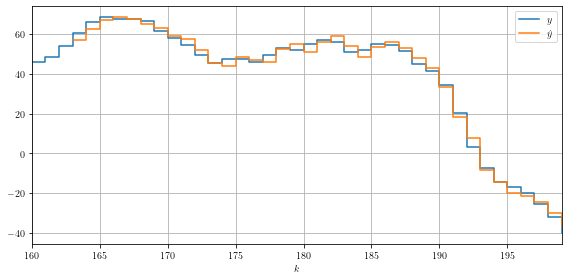

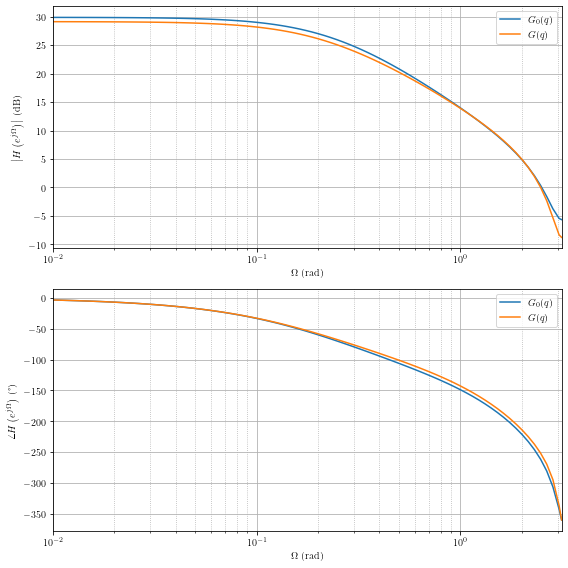

In [20]:
from control import frequency_response, mag2db

plt.figure(figsize=(8,4))
plt.plot(t_v, y_v, label='$y$', drawstyle='steps-post')
plt.plot(t_v[int(model.delay):], model.yp, label='$\\hat{y}$', drawstyle='steps-post')
plt.xlim(t_v[0], t_v[-1])
plt.xlabel('$k$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

logspace = np.logspace(-2, 1, 100)
logspace = np.append(logspace[logspace < np.pi], np.pi)

mag,  phase,  omega  = frequency_response(model.G, omega=logspace)
mag0, phase0, omega0 = frequency_response(G0,      omega=logspace)

fig, axs = plt.subplots(2, 1, figsize=(8,8))
axs[0].plot(omega0, mag2db(mag0), label = '$G_0(q)$')
axs[1].plot(omega0, 180/np.pi*np.unwrap(phase0), label = '$G_0(q)$')
axs[0].plot(omega,  mag2db(mag), label = '$G(q)$')
axs[1].plot(omega,  180/np.pi*np.unwrap(phase), label = '$G(q)$')
for ax in axs:
  ax.set_xscale('log')
  ax.set_xlim(omega[0], omega[-1])
  ax.grid(which='major')
  ax.grid(which='minor', linestyle=':')
  ax.legend()
  ax.set_xlabel('$\\Omega$ (rad)')
  axs[0].set_ylabel(f'$\\left| {tf}\\left(e^{{j \\, \\Omega}}\\right) \\right|$ (dB)')
  axs[1].set_ylabel(f'$\\angle{{{tf}\\left(e^{{j \\, \\Omega}}\\right)}}$ (°)')
plt.tight_layout()
plt.show()

# Extra code for LaTeX

In [21]:
columns=[
  'model',
  'na', 'nb', 'nc', 'nd', 'nf', 'nk',
  'AICCv', 'AICCi',
  'Jv', 'Ji',
]

qty = 20

display_models(models.sort_values(by=['AICCv']), precision=3, qty=qty, columns=columns)
# display_models(models.loc[(models.model == 'BJ')].sort_values(by=['AICCv']), precision=3, qty=qty, columns=columns)

,model,na,nb,nc,nd,nf,nk,AICCv,AICCi,Jv,Ji
24,ARX,2,1,-,-,-,1,79.463,288.142,5.801,5.75
44,ARX,3,1,-,-,-,1,80.358,289.971,5.556,5.74
28,ARX,2,2,-,-,-,1,80.596,276.503,5.589,5.276
20,ARX,2,0,-,-,-,1,80.82,290.423,6.384,5.91
40,ARX,3,0,-,-,-,1,81.303,291.572,6.074,5.875
32,ARX,2,3,-,-,-,1,82.077,278.289,5.41,5.264
64,ARX,4,1,-,-,-,1,82.145,288.495,5.419,5.611
160,ARMAX,2,0,1,-,-,1,82.406,292.387,6.244,5.905
240,ARMAX,3,0,1,-,-,1,82.44,291.698,5.853,5.802
1136,BJ,-,2,0,2,1,1,82.909,276.778,5.524,5.214
